In [ ]:
# Download the training set
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip

--2024-02-18 18:42:39--  https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.162.207, 173.194.210.207, 173.194.211.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.162.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘horse-or-human.zip’

horse-or-human.zip  100%[===================>] 142.65M   183MB/s    in 0.8s    

2024-02-18 18:42:40 (183 MB/s) - ‘horse-or-human.zip’ saved [149574867/149574867]



In [ ]:
# Download the validation set
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week3/validation-horse-or-human.zip

--2024-02-18 18:42:49--  https://storage.googleapis.com/tensorflow-1-public/course2/week3/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.162.207, 173.194.210.207, 173.194.211.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.162.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11480187 (11M) [application/zip]
Saving to: ‘validation-horse-or-human.zip’

validation-horse-or 100%[===================>]  10.95M  --.-KB/s    in 0.1s    

2024-02-18 18:42:49 (102 MB/s) - ‘validation-horse-or-human.zip’ saved [11480187/11480187]



In [ ]:
import os
import zipfile
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
zip_ref = zipfile.ZipFile('./horse-or-human.zip','r')
zip_ref.extractall('horse-or-human')

zip_ref = zipfile.ZipFile('./validation-horse-or-human.zip', 'r')
zip_ref.extractall('validation-horse-or-human')

zip_ref.close()

train_horse_dir = os.path.join('horse-or-human/horses')

train_human_dir = os.path.join("horse-or-human/humans")

validation_human_dir = os.path.join('validation-horse-or-human/humans')

validation_horse_dir = os.path.join('validation-horse-or-human/horses')

In [ ]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters = 16, kernel_size = (3, 3),
                        activation = 'relu', input_shape = (300,300,3)),
    keras.layers.MaxPooling2D(2, 2),

    keras.layers.Conv2D(filters = 32, kernel_size = (3, 3),
                        activation = 'relu'),
    keras.layers.MaxPooling2D(2, 2),

    keras.layers.Conv2D(filters = 64, kernel_size = (3, 3),
                        activation = 'relu'),
    keras.layers.MaxPooling2D(2, 2),

    keras.layers.Flatten(),

    keras.layers.Dense(units = 512, activation = 'relu'),

    keras.layers.Dense(units = 1, activation = 'sigmoid')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 149, 149, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 73, 73, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 35, 35, 64)        0

In [ ]:
from keras.optimizers import RMSprop

model.compile(
    loss = 'binary_crossentropy',
    optimizer = RMSprop(learning_rate=1e-4),
    metrics = ['accuracy']
)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale = 1/255,
    rotation_range = 40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(
    rescale = 1/255
)

train_generator = train_datagen.flow_from_directory(
    'horse-or-human',
    target_size = (300,300),
    batch_size = 128,
    class_mode = 'binary'
)

validation_generator = validation_datagen.flow_from_directory(
    'validation-horse-or-human',
    target_size = (300, 300),
    batch_size = 32,
    class_mode = 'binary'
)

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch = 8,
    epochs = 20,
    verbose = 1,
    validation_data = validation_generator,
    validation_steps = 8
)

Epoch 1/20
8/8 [==============================] - 179s 21s/step - loss: 0.8018 - accuracy: 0.5128 - val_loss: 0.7060 - val_accuracy: 0.5000
Epoch 2/20
8/8 [==============================] - 128s 15s/step - loss: 0.6823 - accuracy: 0.5729 - val_loss: 0.6836 - val_accuracy: 0.5000
Epoch 3/20
8/8 [==============================] - 132s 16s/step - loss: 0.6728 - accuracy: 0.6240 - val_loss: 0.7129 - val_accuracy: 0.5000
Epoch 4/20
8/8 [==============================] - 125s 15s/step - loss: 0.6594 - accuracy: 0.6285 - val_loss: 0.7336 - val_accuracy: 0.5000
Epoch 5/20
8/8 [==============================] - 138s 17s/step - loss: 0.6491 - accuracy: 0.6440 - val_loss: 0.7528 - val_accuracy: 0.5000
Epoch 6/20
8/8 [==============================] - 123s 14s/step - loss: 0.6379 - accuracy: 0.6452 - val_loss: 0.7060 - val_accuracy: 0.5000
Epoch 7/20
8/8 [==============================] - 125s 18s/step - loss: 0.6195 - accuracy: 0.6719 - val_loss: 0.6435 - val_accuracy: 0.5586
Epoch 8/20
8/8 [====

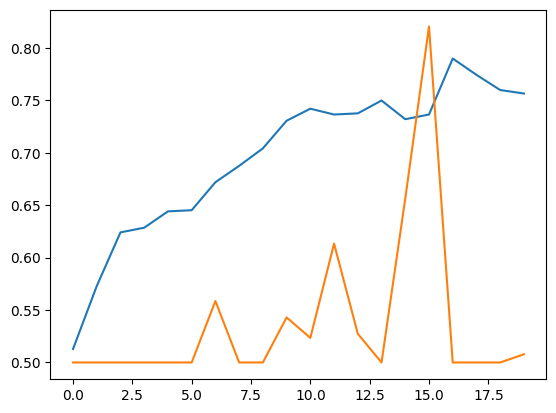

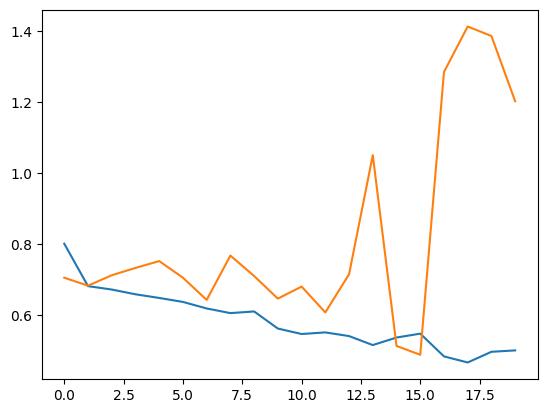

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, acc, label="Training Accuracy")
plt.plot(epochs, val_acc, label="Validation Accuracy")
plt.figure()

plt.plot(epochs, loss, label="Training Loss")
plt.plot(epochs, val_loss, label="Validation Loss")

plt.show()